In [ ]:
# https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france/data

In [19]:
#Oto przykładowe funkcje, które mogą być używane w procesie czyszczenia danych:

#Usuwanie duplikatów: DataFrame.drop_duplicates()
#Obsługa brakujących wartości: DataFrame.fillna() lub DataFrame.dropna()
#Czyszczenie ciągów znaków: Series.str.replace() lub Series.str.extract()
#Radzenie sobie z wartościami odstającymi: stosowanie metod statystycznych, takich jak IQR
#Przetwarzanie danych czasowych: pandas.to_datetime()
#Grupowanie danych: DataFrame.groupby()

In [ ]:
# Cel: analiza opóźnień pociągów we Francji
# Stakeholder: zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych

In [206]:
# Cel: analiza opóźnień pociągów we Francji
# Interesariusz: zarządca kolei, który musi zidentyfikować przyczyny opóźnień na wybranych liniach kolejowych

In [211]:
# !pip install missingno 

# missingno jest to biblioteka w Pythonie, która pomaga wizualizować brakujące dane w zbiorach danych. Przydatna jest zwłaszcza w analizie danych, gdy chcemy zrozumieć, jakie wartości brakuje w naszym zestawie danych.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms


In [2]:
reg = pd.read_csv('C:/Users/barto/Desktop/Public transport traffic data in France/Regularities_by_liaisons_Trains_France.csv')

In [3]:
reg = pd.read_csv(r'C:\Users\barto\Desktop\Public transport traffic data in France\Regularities_by_liaisons_Trains_France.csv')

In [4]:
reg

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
reg.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Comment (optional) delays at departure',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Comment (optional) delays on arrival',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due

In [6]:
# Year - rok
# Month - Miesiąc
# Departure station - Stacja odjazdu
# Arrrival station - Stacja dojazdowa
# Average travel time (min) - Średni czas podróży (min)
# Number of expected circulations - Liczba przewidywanych kursów pociągu
# Number of cancelled trains - liczba odwołanych pociągów
# Number of late trains at departure - Liczba spóźnionych pociągów w czasie odjazdu
# Average delay of late departing trains (min) - Średnie opóźnienie spóźnionych pociągów odjeżdżających (min)
# Average delay of all departing trains (min) - Średnie opóźnienie wszystkich odjeżdżających pociągów (min)
# Comment (optional) delays at departure - opóźnienia w odjeździe.
# Number of trains late on arrival - Liczba pociągów opóźnionych w dniu przyjazdu
# Average delay of late arriving trains (min) - Średnie opóźnienie spóźnionych pociągów (min)
# Average delay of all arriving trains (min) - Średnie opóźnienie wszystkich przyjeżdżających pociągów (min)
# Comment (optional) delays on arrival - Opóźnienia w dniu przyjazdu
# % trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) - % pociągów spóźnia się z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne itp.)
# % trains late due to traffic management (rail line traffic, network interactions) - % pociągów spóźnionych ze względu na zarządzanie ruchem (ruch na linii kolejowej, interakcje sieciowe)
# % trains late due to rolling stock - % pociągów spóźnionych ze względu na tabor
# % trains late due to station management and reuse of material - % pociągów spóźnionych ze względu na zarządzanie stacją i ponowne wykorzystanie materiałów
# % trains late due to passenger traffic (affluence, PSH management, connections) - % pociągów spóźnionych ze względu na ruch pasażerski (zamożność, zarządzanie PSH, połączenia)
# Number of late trains > 15min - Liczba spóźnionych pociągów > 15min
# Average train delay > 15min - Średnie opóźnienie pociągu > 15 min
# Number of late trains > 30min - Liczba spóźnień pociągów > 30min
# Number of late trains > 60min - Liczba spóźnień pociągów > 60min
# Period - Okres
# Delay due to external causes - Opóźnienie z przyczyn zewnętrznych
# Delay due to railway infrastructure - Opóźnienie spowodowane infrastrukturą kolejową
# Delay due to traffic management - Opóźnienie spowodowane organizacją ruchu
# Delay due to rolling stock - Opóźnienie spowodowane taborem
# Delay due to station management and reuse of material - Opóźnienie spowodowane zarządzaniem stacją i ponownym wykorzystaniem materiału
# Delay due to travellers taken into account - Opóźnienie z powodu uwzględnienia podróżnych


In [7]:
reg["Departure station"].value_counts().head(10)

Departure station
PARIS LYON              1614
PARIS MONTPARNASSE      1056
PARIS EST                396
LYON PART DIEU           360
MARSEILLE ST CHARLES     288
PARIS NORD               264
LILLE                    198
NANTES                   144
RENNES                   144
MONTPELLIER              132
Name: count, dtype: int64

In [8]:
reg["Average travel time (min)"].head(10)

0    131.914980
1    175.611570
2     62.395349
3    172.421053
4     67.310000
5    266.594737
6    265.262887
7     85.399381
8     46.305556
9     67.000000
Name: Average travel time (min), dtype: float64

In [9]:
df = pd.DataFrame(reg)
df

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Comment (optional) delays at departure',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Comment (optional) delays on arrival',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due

In [42]:
# Funkcja stats w Pythonie służy do wyświetlania informacji o kształcie (liczbie wierszy i kolumn) oraz typach danych w ramce danych (DataFrame).

In [12]:
print(f'Rows: {df.shape[0]}') # [0] to indeks, który wskazuje, że chcemy uzyskać pierwszy element krotki, czyli liczbę wierszy.

Rows: 7806


In [13]:
f'Columns: {df.shape[1]}' # [1] to indeks, który wskazuje, że chcemy uzyskać pierwszy element krotki, czyli liczbę wierszy.

'Columns: 32'

In [14]:
print(df.dtypes)

Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                                                                             

In [15]:
df.head(10)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,...,47.343452,13.0,4.0,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
6,2019,7.0,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.262887,194.0,0.0,86.0,5.124225,1.714691,...,45.610920,13.0,4.0,2019-07,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276
7,2019,7.0,PARIS EST,METZ,85.399381,323.0,0.0,239.0,10.278452,7.552477,...,60.874405,16.0,11.0,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
8,2019,7.0,PARIS EST,REIMS,46.305556,222.0,6.0,190.0,4.985263,4.361883,...,47.841667,11.0,5.0,2019-07,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000
9,2019,7.0,PARIS NORD,DOUAI,67.000000,180.0,3.0,63.0,13.862169,4.626083,...,35.613889,10.0,3.0,2019-07,6.666667,26.666667,20.000000,20.000000,26.666667,0.000000


In [16]:
df.isna().head(10) 
# .isna() to metoda, która zwraca nową ramkę danych, gdzie każda komórka jest oznaczona jako True, jeśli odpowiadająca jej wartość w oryginalnej ramce danych jest NaN (Not a Number), czyli brakująca, lub False, jeśli wartość istnieje.

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
NaN = df.isna().sum() # ta metoda zwraca liczbę brakujących wartości dla każdej kolumny.
NaN                   # to metoda, która zwraca serię z liczbą brakujących wartości (NaN) dla każdej kolumny w ramce danych dataframe.

Year                                                                                                                      0
Month                                                                                                                     0
Departure station                                                                                                         0
Arrival station                                                                                                           0
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Number of cancelled trains                                                                                                0
Number of late trains at departure                                                                                        0
Average 

In [18]:
NaN > 0


Year                                                                                                                   False
Month                                                                                                                  False
Departure station                                                                                                      False
Arrival station                                                                                                        False
Average travel time (min)                                                                                               True
Number of expected circulations                                                                                         True
Number of cancelled trains                                                                                             False
Number of late trains at departure                                                                                     False


In [19]:
print(NaN[NaN>0])
# to instrukcja, która wyświetla tylko te kolumny z NaN, które spełniają warunek NaN > 0, czyli mają brakujące wartości.

Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                                   6003
% trains

In [20]:
print(df.duplicated().sum())

0


In [21]:
print(df.nunique().sum()) #  służy do obliczenia i wyświetlenia całkowitej liczby unikalnych wartości we wszystkich kolumnach ramki danych

55869


In [22]:
df.select_dtypes(include=['int64', 'int32']).columns # znajduje wszystkie kolumny w df, które mają typ danych int64 lub int32

Index(['Year'], dtype='object')

In [23]:
def change_integers_to_int16(df):
    """
    Change the data type of all integer columns in the dataframe to int16.         # Zmień typ danych wszystkich kolumn całkowitych w ramce danych na int16

    Args:
        df: DataFrame from which we load data.                                     # DataFrame z którego ładujemy dane
    """
    int_columns = df.select_dtypes(include=['int64', 'int32']).columns
    for column in int_columns:
        df[column] = df[column].astype('int16')               # df[column] = df[column].astype('int16'). Wewnątrz pętli, dla każdej kolumny column, kod zmienia typ danych na int16 za pomocą metody .astype('int16')
    
    # zmienia ich typ na int16 za pomocą metody .astype('int16')
    # int16 to typ danych, który używa 16 bitów pamięci i jest odpowiedni dla liczb całkowitych, które mieszczą się w zakresie od -32768 do 32767.
    # Typ int16 od int64 i int32, który jest używany w Twojej funkcji, jest mniejszy i może przechowywać liczby całkowite od -32,768 do 32,767. Zmiana typu danych na int16 jest przydatna, gdy wiesz, że wartości w kolumnach mieszczą się w tym zakresie, ponieważ pozwala to zaoszczędzić pamięć. 

In [24]:
change_integers_to_int16(df) # wywołanie funkcji. 

In [25]:
df.dtypes

Year                                                                                                                     int16
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                                                                             

In [26]:
df.select_dtypes(include=['int64', 'int32']).columns # 0 teraz jest int64 i int32

Index([], dtype='object')

In [27]:
def columns_bsize(df) :
    """ Function shows size of each column in bytes.            # Funkcja pokazuje rozmiar każdej kolumny w bajtach.
    
    Args:
        df -> df from where we load data

    Return:
        Function returns list of column names and size in byte          # Funkcja zwraca listę nazw kolumn i rozmiaru w bajtach
    
    """
    return [f'{x} --- {df[x].nbytes} --- {df[x].dtype}' for x in df]

In [28]:
columns_bsize(df)

['Year --- 15612 --- int16',
 'Month --- 62448 --- float64',
 'Departure station --- 62448 --- object',
 'Arrival station --- 62448 --- object',
 'Average travel time (min) --- 62448 --- float64',
 'Number of expected circulations --- 62448 --- float64',
 'Number of cancelled trains --- 62448 --- float64',
 'Number of late trains at departure --- 62448 --- float64',
 'Average delay of late departing trains (min) --- 62448 --- float64',
 'Average delay of all departing trains (min) --- 62448 --- float64',
 'Comment (optional) delays at departure --- 62448 --- float64',
 'Number of trains late on arrival --- 62448 --- float64',
 'Average delay of late arriving trains (min) --- 62448 --- float64',
 'Average delay of all arriving trains (min) --- 62448 --- float64',
 'Comment (optional) delays on arrival --- 62448 --- object',
 '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) --- 62448 --- float64',
 '% trains late due to 

In [29]:
[f'{x} --- {df[x].nbytes} --- {df[x].dtype}' for x in df] # To jest list comprehension, czyli skrócony sposób na tworzenie listy w Pythonie.

# {x}: Nazwa kolumny.
# {df[x].nbytes}: Liczba bajtów zajmowanych przez kolumnę x
# {df[x].dtype}: Typ danych kolumny x.

['Year --- 15612 --- int16',
 'Month --- 62448 --- float64',
 'Departure station --- 62448 --- object',
 'Arrival station --- 62448 --- object',
 'Average travel time (min) --- 62448 --- float64',
 'Number of expected circulations --- 62448 --- float64',
 'Number of cancelled trains --- 62448 --- float64',
 'Number of late trains at departure --- 62448 --- float64',
 'Average delay of late departing trains (min) --- 62448 --- float64',
 'Average delay of all departing trains (min) --- 62448 --- float64',
 'Comment (optional) delays at departure --- 62448 --- float64',
 'Number of trains late on arrival --- 62448 --- float64',
 'Average delay of late arriving trains (min) --- 62448 --- float64',
 'Average delay of all arriving trains (min) --- 62448 --- float64',
 'Comment (optional) delays on arrival --- 62448 --- object',
 '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.) --- 62448 --- float64',
 '% trains late due to 

In [30]:
len(df) # liczbę wierszy w ramce danych 

7806

In [31]:
int(len(df))

7806

In [32]:
threshold = int(len(df) * 0.05) # próg (threshold) jako 5% liczby wierszy w ramce danych. Wynik jest konwertowany na liczbę całkowitą (int)
threshold

390

In [33]:
df.columns[df.isna().sum() <= threshold]      # Zwraca listę nazw kolumn, dla których liczba brakujących wartości jest mniejsza lub równa obliczonemu progu, czyli 390

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [34]:
df.isna().sum()  # Oblicza liczbę brakujących wartości dla każdej kolumny

Year                                                                                                                      0
Month                                                                                                                     0
Departure station                                                                                                         0
Arrival station                                                                                                           0
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Number of cancelled trains                                                                                                0
Number of late trains at departure                                                                                        0
Average 

In [35]:
def drop_missing_five(df) :
    """ Function that shows which column is in drop threshold of 5% missing values.     # Funkcja pokazująca, która kolumna znajduje się w progu spadku wynoszącym 5% brakujących wartości
    
    Args:
        df-> df from where we load data

    Return:
        list of columns below 5% missing values.                                        # lista kolumn poniżej 5% brakujących wartości.
    
    """
    threshold  = int(len(df) * 0.05)
    return df.columns[df.isna().sum() <= threshold]

In [36]:
drop_missing_five(df)

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [37]:
def dataset_IQR(col) :                                    # Funkcja dataset_IQR oblicza rozstęp międzykwartylowy (IQR) dla danej kolumny
    """ Calculate IQR for given column
     
    Args:
        col -> column for IQR calculation                 # Oblicz IQR dla danej kolumny

    Return:
        IQR value of specific column, value -> float      # Wartość IQR konkretnej kolumny, wartość -> float

    """
    return np.quantile(col, 0.75) - np.quantile(col, 0.25)

# col: To jest argument funkcji, który reprezentuje kolumnę, dla której chcemy obliczyć IQR.
# np.quantile(col, 0.75): To wyrażenie oblicza trzeci kwartyl (Q3), czyli wartość, poniżej której znajduje się 75% danych w kolumnie col
# np.quantile(col, 0.25): To wyrażenie oblicza pierwszy kwartyl (Q1), czyli wartość, poniżej której znajduje się 25% danych w kolumnie col
# return np.quantile(col, 0.75) - np.quantile(col, 0.25): To jest wynikowy rozstęp międzykwartylowy (IQR), który jest różnicą między trzecim a pierwszym kwartylem.
# IQR jest używany w analizie danych jako miara zmienności w rozkładzie danych. Jest to przydatne narzędzie do identyfikacji potencjalnych wartości odstających w kolumnach.

In [38]:
dataset_IQR(df["Average delay of late departing trains (min)"]) 

# Jeśli funkcja dataset_IQR(df["Average delay of late departing trains (min)"]) zwróciła wartość 11.15374909292, oznacza to, że zakres międzykwartylowy (IQR) dla kolumny “Average delay of late departing trains (min)” wynosi 11.15374909292 minut. IQR jest miarą rozproszenia danych i reprezentuje różnicę między 75. a 25. percentylem danych.
# W kontekście opóźnień pociągów, IQR mówi nam, że środkowe 50% opóźnień pociągów mieści się w przedziale 11.15374909292 minut. To może być użyteczne do identyfikacji wartości odstających, które są znacznie wyższe lub niższe niż typowe opóźnienia. Wartości odstające mogą wskazywać na nietypowe zdarzenia lub problemy w systemie transportowym, które mogą wymagać dalszej analizy.

11.15374909292

In [39]:
# Funkcja lower_tresh, którą zdefiniowałeś w Pythonie, oblicza dolną granicę wartości służącą do wykrywania wartości odstających w zbiorze danych. Jest to oparte na metodzie zakresu międzykwartylowego (IQR), która jest powszechną techniką statystyczną stosowaną do identyfikacji wartości odstających.

def lower_tresh(col):
    """ Calculate lower treshold                                    # Oblicz dolny próg

    Args:
        col -> column for IQR calculation                           # col -> kolumna do obliczenia IQR

    Return:
        lower outlier value -> float                                # dolna wartość odstająca -> float
    """ 
    return np.quantile(col, 0.25) - (1.5 * dataset_IQR(col))

# np.quantile(col, 0.25): Oblicza pierwszy kwartyl (Q1) danych w kolumnie col, który jest wartością poniżej, której znajduje się 25% danych.
# dataset_IQR(col): To powinna być funkcja obliczająca IQR danych w kolumnie col. IQR to różnica między trzecim kwartylem (Q3) a pierwszym kwartylem (Q1).
# 1.5 * dataset_IQR(col): Mnożymy IQR przez 1,5, aby uzyskać margines wartości odstających. Jeśli wartość w kolumnie col jest mniejsza niż dolna granica, uznajemy ją za wartość odstającą.
# Współczynnik 1,5 jest często używany w metodzie zakresu międzykwartylowego (IQR) do wykrywania wartości odstających.
# Wartość 1,5 jest stosunkowo umiarkowana i często używana w praktyce. Można również używać innych wartości, takich jak 2,0 lub 3,0, w zależności od specyfiki danych i wymagań analizy.

In [40]:
lower_tresh(df["Average delay of late departing trains (min)"])

# Jeśli funkcja lower_tresh(df["Average delay of late departing trains (min)"]) zwróciła wartość -9.171006931425, oznacza to, że dolna granica dla wykrywania wartości odstających w kolumnie “Average delay of late departing trains (min)” wynosi -9.171006931425 minut. W praktyce, wartość ujemna jako dolna granica dla opóźnień pociągów nie ma sensu, ponieważ opóźnienia nie mogą być mniejsze niż 0.

-9.171006931425

In [41]:
# Funkcja upper_tresh w Pythonie służy do obliczania górnej granicy wartości dla wykrywania wartości odstających w zbiorze danych.


def upper_tresh(col) :
    """ Calculate upper treshold

    Args:
        col -> column for IQR calculation

    Return:
        upper outliner value -> float
    """ 
    return np.quantile(col, 0.75) + (1.5 * dataset_IQR(col))

# np.quantile(col, 0.75): Oblicza trzeci kwartyl (Q3) danych w kolumnie col, który jest wartością powyżej której znajduje się 75% danych.
# dataset_IQR(col): To powinna być funkcja, która oblicza IQR danych w kolumnie col. IQR to różnica między trzecim kwartylem (Q3) a pierwszym kwartylem (Q1).
# 1.5 * dataset_IQR(col): Mnożenie IQR przez 1,5 daje margines dla wartości odstających. Jeśli wartość w kolumnie col jest większa niż ta górna granica, jest uznawana za wartość odstającą.
# Wartość 1,5 jest standardowym mnożnikiem w metodzie IQR i jest używana do umiarkowanego wykrywania wartości odstających. Można użyć innego mnożnika, jeśli chcesz bardziej lub mniej konserwatywnego podejścia do identyfikacji wartości odstających.
# aby zdefiniować funkcję dataset_IQR w swoim kodzie, aby móc użyć jej w funkcji upper_tresh !

In [42]:
upper_tresh(df["Average delay of late departing trains (min)"])

# Jeśli funkcja upper_tresh(df["Average delay of late departing trains (min)"]) zwróciła wartość 35.443989440254995, oznacza to, że górna granica dla wykrywania wartości odstających w kolumnie “Average delay of late departing trains (min)” wynosi 35.443989440254995 minut. Wartości w tej kolumnie, które przekraczają tę granicę, mogą być uznane za wartości odstające.
# Wartości powyżej 35.44 minut są uznawane za nietypowo wysokie opóźnienia i mogą wskazywać na wyjątkowe zdarzenia lub problemy, które mogą wymagać dalszego zbadania.

35.443989440254995

In [43]:
def lower_treshholders(df) :                                  
    """ Check how many outliers-lower we have for each column           # celem jest sprawdzenie liczby wartości odstających poniżej dolnej granicy dla każdej kolumny.
    
    Args:
        df -> df from where we load data
    
    """
    for x in df.select_dtypes(include = 'number') :
        print(f'Column: {x}')
        print(f'Lower treshold {lower_tresh(df[x])}')
        print(f'Ilosc wartosci ponizej dolnego outlinera: {df[x][df[x] < lower_tresh(df[x])].count()}\n')

# Funkcja lower_treshholders w Pythonie jest przeznaczona do sprawdzania liczby wartości odstających poniżej dolnej granicy dla każdej kolumny numerycznej w ramce danych
# def lower_treshholders(df): rozpoczyna definicję funkcji o nazwie lower_treshholders, która przyjmuje jeden argument: df.
# Args: to sekcja dokumentacji, która opisuje argumenty funkcji.
# Pętla for: for x in df.select_dtypes(include='number'): to pętla, która iteruje przez wszystkie kolumny w dataframe, które są typu numerycznego. Wybór kolumn numerycznych jest realizowany przez metodę select_dtypes(include='number').
# print(f'Column: {x}'): Wyświetla nazwę bieżącej kolumny numerycznej.
# print(f'Lower treshold {lower_tresh(df[x])}'): Wyświetla obliczoną dolną granicę wartości odstających dla kolumny x za pomocą funkcji lower_tresh.
# print(f'Ilosc wartosci ponizej dolnego outlinera: {df[x][df[x] < lower_tresh(df[x])].count()}\n'): Liczy i wyświetla liczbę wartości w kolumnie x, które są mniejsze niż obliczona dolna granica, co wskazuje na wartości odstające.

In [44]:
lower_treshholders(df)

Column: Year
Lower treshold 2011.5
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Month
Lower treshold -6.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average travel time (min)
Lower treshold nan
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of expected circulations
Lower treshold nan
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of cancelled trains
Lower treshold -9.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of late trains at departure
Lower treshold -96.0
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of late departing trains (min)
Lower treshold -9.171006931425
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Average delay of all departing trains (min)
Lower treshold nan
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Comment (optional) delays at departure
Lower treshold nan
Ilosc wartosci ponizej dolnego outlinera: 0

Column: Number of trains late on arrival
Lower treshold nan
Ilosc wartosci

In [45]:
# to samo co wyżej tylko troszkę zmienione

def lower_treshholders(df):
    """ Check how many outliers-lower we have for each column                           

    Args:
        dataframe (pandas.DataFrame): Dataframe from where we load data.
    """
    for x in df.select_dtypes(include='number'):
        lower_threshold = lower_tresh(df[x])
        outlier_count = df[x][df[x] < lower_threshold].count()
        print(f'Column: {x}')
        print(f'Lower threshold: {lower_threshold}')
        print(f'Number of values below the lower outlier: {outlier_count}\n')

In [46]:
def upper_treshholders(df) :
    """ Check how many outliners-upper we have for each column                         # celem jest sprawdzenie liczby wartości odstających powyżej górnej granicy dla każdej kolumny.
    
    Args:                                                                              # Args: to sekcja dokumentacji, która opisuje argumenty funkcji.
        df-> df from where we load data
    
    """
    for x in df.select_dtypes(include= 'number') : 
        print(f'Column: {x}')
        print(f'Upper treshold {upper_tresh(df[x])}')
        print(f'Ilosc wartosci powyzej górnego outlinera: {df[x][df[x] > upper_tresh(df[x])].count()}\n')

    # Funkcja upper_treshholders w Pythonie jest przeznaczona do identyfikacji i zliczania wartości odstających powyżej górnej granicy dla każdej kolumny numerycznej w ramce danych (df). 
    # def upper_treshholders(df): rozpoczyna definicję funkcji o nazwie upper_treshholders, która przyjmuje jeden argument: df, który jest ramką danych.
    # Pętla for: for x in df.select_dtypes(include='number'): to pętla, która iteruje przez wszystkie kolumny w df, które są typu numerycznego. Wybór kolumn numerycznych jest realizowany przez metodę select_dtypes(include='number').
    # print(f'Column: {x}'): Wyświetla nazwę bieżącej kolumny numerycznej.
    # print(f'Upper treshold {upper_tresh(df[x])}'): Wyświetla obliczoną górną granicę wartości odstających dla kolumny x za pomocą funkcji upper_tresh.
    # print(f'Ilosc wartosci powyzej górnego outlinera: {df[x][df[x] > upper_tresh(df[x])].count()}\n'): Liczy i wyświetla liczbę wartości w kolumnie x, które są większe niż obliczona górna granica, co wskazuje na wartości odstające.
    # Funkcja upper_tresh musi być zdefiniowana wcześniej w kodzie, aby móc obliczyć górną granicę dla wartości odstających. Wartości odstające to te wartości, które są znacznie wyższe od reszty danych i mogą wskazywać na błędy pomiarowe, nietypowe zdarzenia lub inne anomalie w danych.

In [47]:
upper_treshholders(df)

Column: Year
Upper treshold 2023.5
Ilosc wartosci powyzej górnego outlinera: 0

Column: Month
Upper treshold 18.0
Ilosc wartosci powyzej górnego outlinera: 0

Column: Average travel time (min)
Upper treshold nan
Ilosc wartosci powyzej górnego outlinera: 0

Column: Number of expected circulations
Upper treshold nan
Ilosc wartosci powyzej górnego outlinera: 0

Column: Number of cancelled trains
Upper treshold 15.0
Ilosc wartosci powyzej górnego outlinera: 902

Column: Number of late trains at departure
Upper treshold 192.0
Ilosc wartosci powyzej górnego outlinera: 566

Column: Average delay of late departing trains (min)
Upper treshold 35.443989440254995
Ilosc wartosci powyzej górnego outlinera: 228

Column: Average delay of all departing trains (min)
Upper treshold nan
Ilosc wartosci powyzej górnego outlinera: 0

Column: Comment (optional) delays at departure
Upper treshold nan
Ilosc wartosci powyzej górnego outlinera: 0

Column: Number of trains late on arrival
Upper treshold nan
Ilosc

In [48]:
df

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
def stats(df) :
    """Returns informations about dataset - shape and data types"""
    print('### Shape ###')
    print(f'Rows: {df.shape[0]}')
    print(f'Columns: {df.shape[1]}')
    print('\n')
    print('### Data Types ###')
    print(df.dtypes)
    print('\n')

In [50]:
stats(df)

### Shape ###
Rows: 7806
Columns: 32


### Data Types ###
Year                                                                                                                     int16
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                   

In [51]:
def miss_dupl(df) :
    """Return information about missing values and duplicates in dataset"""                              # Zwróć informacje o brakujących wartościach i duplikatach w zestawie danych
    print('\n')
    print('### Missing Values ###')
    NaN= df.isna().sum()
    print(NaN[NaN > 0])
    print('\n')
    print('### Duplicate Values ###')
    print(df.duplicated().sum())
    print('\n')
    print('### Unique Values ###')
    print(df.nunique().sum())

In [52]:
miss_dupl(df)



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [53]:
df = pd.DataFrame(reg)
df

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
pd.set_option('display.max_columns', None)
df

# Funkcja pd.set_option('display.max_columns', None) w bibliotece pandas służy do modyfikacji opcji wyświetlania. W szczególności ustawia maksymalną liczbę kolumn, które zostaną wyświetlone w ramach DataFrame. Przez ustawienie wartości na None, wszystkie kolumny w DataFrame zostaną wyświetlone bez obcięcia

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,NaN,11.0,37.110606,2.020933,NaN,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,NaN,10.0,49.050000,3.657203,NaN,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,NaN,5.0,33.393333,2.194540,NaN,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000,3.0,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
miss_dupl(df)
# Funkcja miss_dupl(df) analizuje ramkę danych (DataFrame) i zwraca informacje na temat brakujących wartości oraz duplikatów. 



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [57]:
df[df['Average delay of all arriving trains (min)'] < 0]

# nowa ramka danych, która zawiera tylko te wiersze, gdzie opóźnienia są mniejsze niz 0, czyli fałszywe.

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
12,2019,7.0,TOURCOING,BORDEAUX ST JEAN,289.000000,12.0,0.0,4.0,2.654167,0.884722,NaN,NaN,NaN,-0.068056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,2019-07,NaN,NaN,NaN,NaN,NaN,NaN
309,2016,8.0,PARIS LYON,ITALIE,291.133333,45.0,0.0,4.0,22.000000,2.088889,NaN,3.0,27.333333,-2.066667,NaN,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,3.0,27.333333,0.0,0.0,2016-08,33.333333,0.000000,0.000000,33.333333,0.000000,33.333333
442,2015,3.0,GENEVE,PARIS LYON,173.291845,233.0,0.0,11.0,12.545455,1.545064,NaN,6.0,25.166667,-1.587983,NaN,0.500000,0.250000,0.250000,0.000000,0.000000,0.000000,4.0,30.500000,1.0,0.0,2015-03,50.000000,25.000000,25.000000,0.000000,0.000000,0.000000
469,2015,10.0,PARIS EST,NANCY,96.733788,293.0,0.0,12.0,13.250000,0.713311,NaN,10.0,18.900000,-0.006826,NaN,0.300000,0.200000,0.100000,0.300000,0.000000,0.100000,5.0,23.600000,1.0,0.0,2015-10,30.000000,20.000000,10.000000,30.000000,0.000000,10.000000
539,2017,5.0,LILLE,PARIS NORD,66.863799,558.0,0.0,26.0,14.730769,1.028674,NaN,34.0,17.382353,-1.254480,NaN,0.357143,0.142857,0.142857,0.285714,0.071429,0.000000,11.0,34.518182,6.0,0.0,2017-05,35.714286,14.285714,14.285714,28.571429,7.142857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,2020,6.0,ANGOULEME,PARIS MONTPARNASSE,129.865169,186.0,8.0,108.0,2.498302,1.363764,NaN,12.0,20.011111,-0.188858,NaN,0.181818,0.454545,0.000000,0.272727,0.090909,0.000000,5.0,29.826667,2.0,0.0,2020-06,18.181818,45.454545,0.000000,27.272727,9.090909,0.000000
7757,2020,6.0,RENNES,PARIS MONTPARNASSE,104.387800,487.0,28.0,269.0,2.869579,1.578286,NaN,28.0,21.353571,-0.103994,NaN,0.280000,0.280000,0.120000,0.240000,0.040000,0.040000,16.0,28.066667,3.0,1.0,2020-06,28.000000,28.000000,12.000000,24.000000,4.000000,4.000000
7759,2020,6.0,TOURS,PARIS MONTPARNASSE,81.932584,98.0,9.0,40.0,1.413750,0.525281,NaN,2.0,10.141667,-0.606929,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,NaN,0.0,0.0,2020-06,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
7788,2020,5.0,BREST,PARIS MONTPARNASSE,235.462366,107.0,14.0,67.0,2.182836,1.571864,NaN,3.0,41.205556,-1.131900,NaN,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,3.0,41.205556,2.0,0.0,2020-05,0.000000,33.333333,0.000000,66.666667,0.000000,0.000000


In [186]:
df.shape

(7806, 32)

In [187]:
df['Average delay of all arriving trains (min)'].count() 

# 7806 - 7743 = 63. Mamy 63 NaN (puste wartości)

7743

In [207]:
df[df['Average delay of all arriving trains (min)'].isnull()].count()   # 63 wiersze mają NaN w tej kolumnie

Year                                                                                                                   63
Month                                                                                                                  63
Departure station                                                                                                      63
Arrival station                                                                                                        63
Average travel time (min)                                                                                               0
Number of expected circulations                                                                                         0
Number of cancelled trains                                                                                             63
Number of late trains at departure                                                                                     63
Average delay of late de

In [61]:
# Data Cleaning

In [189]:
# List of columns for drop
col_to_drop = [
    'Period',
    'Comment (optional) delays at departure',
    'Comment (optional) delays on arrival',
    'Delay due to railway infrastructure',
    'Delay due to traffic management', 'Delay due to rolling stock',
    'Delay due to station management and reuse of material',
    'Delay due to travellers taken into account',
    'Delay due to external causes']

In [208]:
df2 = df.copy()

In [209]:
# Drop non need columns 
df2.drop(columns= col_to_drop, inplace= True)

# parametr inplace określa, czy zmiana ma zostać dokonana bezpośrednio w oryginalnym DataFrame (True) czy też ma zostać zwrócona nowa kopia DataFrame bez usuniętych kolumn (False). W tym przypadku True oznacza, że kolumny zostaną usunięte bezpośrednio z df2, a oryginalny DataFrame zostanie zmodyfikowany.

In [210]:
df2.head(10)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,28.0,47.343452,8.422105,0.259259,0.333333,0.222222,0.185185,0.000000,0.000000,28.0,47.343452,13.0,4.0
6,2019,7.0,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.262887,194.0,0.0,86.0,5.124225,1.714691,29.0,45.610920,8.407474,0.379310,0.275862,0.068966,0.206897,0.034483,0.034483,29.0,45.610920,13.0,4.0
7,2019,7.0,PARIS EST,METZ,85.399381,323.0,0.0,239.0,10.278452,7.552477,52.0,37.144872,5.523633,0.240000,0.180000,0.160000,0.260000,0.160000,0.000000,28.0,60.874405,16.0,11.0
8,2019,7.0,PARIS EST,REIMS,46.305556,222.0,6.0,190.0,4.985263,4.361883,36.0,28.539352,5.154244,0.323529,0.147059,0.176471,0.235294,0.117647,0.000000,18.0,47.841667,11.0,5.0
9,2019,7.0,PARIS NORD,DOUAI,67.000000,180.0,3.0,63.0,13.862169,4.626083,30.0,25.513889,3.633051,0.066667,0.266667,0.200000,0.200000,0.266667,0.000000,18.0,35.613889,10.0,3.0


In [211]:
df2.isna().sum()

Year                                                                                                                     0
Month                                                                                                                    0
Departure station                                                                                                        0
Arrival station                                                                                                          0
Average travel time (min)                                                                                               63
Number of expected circulations                                                                                         63
Number of cancelled trains                                                                                               0
Number of late trains at departure                                                                                       0
Average delay of

In [212]:
df2.dtypes

Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                                                                             

In [213]:
df2 = df2.dropna() # usuwamy NaN. Już nie ma Not na Number


In [214]:
df2.isna().sum() # 0. Ok. Nie ma NaN

Year                                                                                                                   0
Month                                                                                                                  0
Departure station                                                                                                      0
Arrival station                                                                                                        0
Average travel time (min)                                                                                              0
Number of expected circulations                                                                                        0
Number of cancelled trains                                                                                             0
Number of late trains at departure                                                                                     0
Average delay of late departing 

In [215]:
# Create list of columns that should be int type
to_int = ['Year', 'Month', 'Number of expected circulations', 'Number of cancelled trains',
           'Number of trains late on arrival', 'Number of late trains > 15min', 'Number of late trains > 30min',
           'Number of late trains > 60min']

In [216]:
def change_columns_to_int16(df2, columns):
    for column in columns:
        df2.loc[:, column] = df2.loc[:, column].astype('int16')
    return df2

# Użycie .loc[] zapewnia, że operacja jest wykonywana na oryginalnym DataFrame

In [217]:
change_columns_to_int16(df2, to_int)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,2020,5.0,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166.0,17.0,128.0,2.875781,2.434340,6.0,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6.0,28.358333,3.0,0.0
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,11.0,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,10.0,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,5.0,33.393333,2.194540,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000,3.0,48.305556,1.0,1.0


In [218]:
df2.dtypes

Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                                                                             

In [219]:
df2.shape

(7520, 23)

In [220]:
df2.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [221]:
df2["Train Line"] = df2['Departure station'] + " --- " + df2['Arrival station']

In [222]:
df2[["Train Line"]].head(10)

,Train Line
0,ANGOULEME --- PARIS MONTPARNASSE
1,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,LE MANS --- PARIS MONTPARNASSE
3,ST MALO --- PARIS MONTPARNASSE
4,PARIS MONTPARNASSE --- ST PIERRE DES CORPS
5,PARIS MONTPARNASSE --- TOULOUSE MATABIAU
6,TOULOUSE MATABIAU --- PARIS MONTPARNASSE
7,PARIS EST --- METZ
8,PARIS EST --- REIMS
9,PARIS NORD --- DOUAI


In [223]:
df2[["Train Line"]].value_counts()

Train Line                             
AIX EN PROVENCE TGV --- PARIS LYON         66
PARIS MONTPARNASSE --- LAVAL               66
LYON PART DIEU --- MARSEILLE ST CHARLES    66
LYON PART DIEU --- MONTPELLIER             66
LYON PART DIEU --- PARIS LYON              66
                                           ..
PARIS VAUGIRARD --- NANTES                 12
PARIS VAUGIRARD --- BORDEAUX ST JEAN       12
NANTES --- PARIS VAUGIRARD                 12
RENNES --- PARIS VAUGIRARD                 10
TOURCOING --- MARSEILLE ST CHARLES          9
Name: count, Length: 130, dtype: int64

In [224]:
df2.groupby("Train Line").size().head(20).sort_values(ascending=False).reset_index(name = "Count")

,Train Line,Count
0,AIX EN PROVENCE TGV --- PARIS LYON,66
1,BREST --- PARIS MONTPARNASSE,66
2,ANGOULEME --- PARIS MONTPARNASSE,66
3,ARRAS --- PARIS NORD,66
4,AVIGNON TGV --- PARIS LYON,66
5,DIJON VILLE --- PARIS LYON,66
6,BESANCON FRANCHE COMTE TGV --- PARIS LYON,66
7,BORDEAUX ST JEAN --- PARIS MONTPARNASSE,66
8,ANGERS SAINT LAUD --- PARIS MONTPARNASSE,66
9,DOUAI --- PARIS NORD,65


In [226]:
df2.head(5)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,ANGOULEME --- PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,LE MANS --- PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,ST MALO --- PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,PARIS MONTPARNASSE --- ST PIERRE DES CORPS


In [227]:
df2 = df2.dropna(subset=['Average delay of all arriving trains (min)'])
df2

# dropna(): Jest to metoda z biblioteki pandas, która służy do usuwania wierszy lub kolumn z ramki danych (df2), które zawierają wartości NaN (Not a Number, czyli brak danych).
# Parametr subset: Określa, które kolumny mają być brane pod uwagę przy usuwaniu wierszy. W tym przypadku, subset=['Average delay of all arriving trains (min)'] mówi metodzie dropna(), aby usunęła tylko te wiersze, w których w kolumnie 'Average delay of all arriving trains (min)' znajduje się wartość NaN.


,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,ANGOULEME --- PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,LE MANS --- PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,ST MALO --- PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,PARIS MONTPARNASSE --- ST PIERRE DES CORPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,2020,5.0,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166.0,17.0,128.0,2.875781,2.434340,6.0,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6.0,28.358333,3.0,0.0,AIX EN PROVENCE TGV --- PARIS LYON
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,11.0,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0,PARIS LYON --- AVIGNON TGV
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,10.0,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0,PARIS LYON --- MARSEILLE ST CHARLES
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,5.0,33.393333,2.194540,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000,3.0,48.305556,1.0,1.0,PARIS LYON --- NIMES


In [228]:
df2[df2['Average delay of all arriving trains (min)'] < 0]['Average delay of all arriving trains (min)'].count()

# # df2['Average delay of all arriving trains (min)'] < 0 tworzy maskę logiczną, która jest True dla wszystkich wierszy, gdzie wartość w kolumnie Average delay of all arriving trains (min) jest mniejsza niż 0 (czyli opóźnienia są ujemne).
# df2[df2['Average delay of all arriving trains (min)'] < 0] zwraca nową ramkę danych, która zawiera tylko te wiersze, gdzie maska jest True (opożnienia są mniejsze od 0, czyli fałszywe)
# ['Average delay of all arriving trains (min)'].count() zlicza liczbę niepustych wartości w tej kolumnie, co daje nam liczbę wierszy z ujemnymi opóźnieniam
# Wniosek 149 wierszy się nie nadaje do analizy. W kolumnie "Średnie opóźnienie wszystkich przyjeżdżających pociągów (min)" nie ma NaN i wartości mniejszych od 0

149

In [229]:
df2[df2['Average delay of all arriving trains (min)'] >= 0] # nowa ramka danych df2, gdzie Średnie opóźnienie wszystkich przyjeżdżających pociągów (min) >= 0. 

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,ANGOULEME --- PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,LE MANS --- PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,ST MALO --- PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,PARIS MONTPARNASSE --- ST PIERRE DES CORPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2020,5.0,LYON PART DIEU,LILLE,193.436620,87.0,16.0,62.0,4.632527,4.026291,4.0,21.483333,3.508451,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,5.0,36.320833,3.0,0.0,LYON PART DIEU --- LILLE
7800,2020,5.0,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166.0,17.0,128.0,2.875781,2.434340,6.0,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6.0,28.358333,3.0,0.0,AIX EN PROVENCE TGV --- PARIS LYON
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,11.0,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0,PARIS LYON --- AVIGNON TGV
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,10.0,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0,PARIS LYON --- MARSEILLE ST CHARLES


In [230]:
df2 = df2[df2['Average delay of all arriving trains (min)'] >= 0] # nowa ramka danych

In [ ]:
# teraz dla innych kolumn

In [231]:
df2[df2['Average travel time (min)'] < 0]['Average travel time (min)'].count()  # wynik 0. To ok

0

In [90]:
df2[df2['Average delay of late departing trains (min)'] < 0]['Average delay of late departing trains (min)'].count()  # 0. Ok

0

In [91]:
df2[df2['Average delay of all departing trains (min)'] < 0]['Average delay of all departing trains (min)'].count()  


0

In [232]:
df2[df2['Average delay of all departing trains (min)'] >= 0]

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,ANGOULEME --- PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,LE MANS --- PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,ST MALO --- PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,PARIS MONTPARNASSE --- ST PIERRE DES CORPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2020,5.0,LYON PART DIEU,LILLE,193.436620,87.0,16.0,62.0,4.632527,4.026291,4.0,21.483333,3.508451,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,5.0,36.320833,3.0,0.0,LYON PART DIEU --- LILLE
7800,2020,5.0,AIX EN PROVENCE TGV,PARIS LYON,188.161074,166.0,17.0,128.0,2.875781,2.434340,6.0,28.358333,0.310738,0.500000,0.166667,0.166667,0.000000,0.166667,0.000000,6.0,28.358333,3.0,0.0,AIX EN PROVENCE TGV --- PARIS LYON
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,11.0,37.110606,2.020933,0.272727,0.181818,0.090909,0.363636,0.090909,0.000000,8.0,46.264583,4.0,1.0,PARIS LYON --- AVIGNON TGV
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,10.0,49.050000,3.657203,0.300000,0.300000,0.100000,0.300000,0.000000,0.000000,10.0,49.050000,6.0,1.0,PARIS LYON --- MARSEILLE ST CHARLES


In [233]:
df2 = df2[df2['Average delay of all departing trains (min)'] >= 0] # przypisanie

In [96]:
# szukamy dalej

df2[df2['Average delay of late arriving trains (min)'] < 0]['Average delay of late arriving trains (min)'].count()  # 0. ok

0

In [234]:
df2[df2['Average train delay > 15min'] < 0]['Average train delay > 15min'].count() # 0. Ok

0

In [235]:
df2[[ 'Average delay of late departing trains (min)', 
     'Average delay of late arriving trains (min)']].describe()

# Wniosek: Średnie opóźnienie spóźnionych pociągów odjeżdżających (min) wynosi 15,01 min, a Średnie opóźnienie spóźnionych pociągów (min), czyli te, które przyjechały na stacje wynosi 32,97 min. Czyli wychodzi na to, że pociąg się spóźnia na stację trochę dłużej i następnie pociąg jak odjeżdza ze stacji to przyśpiesza, żeby nadrobić czas.

,Average delay of late departing trains (min),Average delay of late arriving trains (min)
count,7281.000000,7281.000000
mean,14.967642,32.985750
std,13.200392,13.628061
min,0.000000,8.118182
25%,7.889286,24.166667
50%,13.705882,31.093750
75%,18.871782,39.419355
max,316.188095,258.000000


In [236]:
df2[df2['Average delay of late arriving trains (min)'] < 0]['Average delay of late arriving trains (min)'].count() # 0. Ok

0

In [237]:
df2[df2['Average delay of late departing trains (min)'] < 0]['Average delay of late departing trains (min)'].count() # 0. Ok

0

In [238]:
df2[df2['Average delay of late departing trains (min)']  >= 0]['Average delay of late departing trains (min)'].count() # 0. Mamy 7281 wierszy

7281

In [239]:
df2[df2['Average delay of late arriving trains (min)']  >= 0]['Average delay of late arriving trains (min)'].count() 

7281

In [ ]:
# Warto również rozważyć analizę korelacji między kolumnami, aby zrozumieć, jak różne aspekty opóźnień są ze sobą powiązane. Na przykład, jeśli większe opóźnienia przy odjeździe korelują z większymi opóźnieniami przy przyjeździe, może to wskazywać na systemowe problemy wpływające na całą sieć kolejową ?

In [240]:
df2[['Average delay of all departing trains (min)', 
     'Average delay of all arriving trains (min)']].describe().round(2)

# Średnie opóźnienie wszystkich odjeżdżających pociągów --> Ta kolumna odnosi się do średniego opóźnienia wszystkich pociągów odjeżdżających z danej stacji, niezależnie od tego, czy odjechały one punktualnie, czy z opóźnieniem. 
# Wniosek: z Analizy wynika, że Średnie opóźnienie wszystkich !!! odjeżdżających pociągów (min) wynosi 3,12 minuty , a Średnie opóźnienie wszystkich przyjeżdżających pociągów (min) wynosi 5,61 min

,Average delay of all departing trains (min),Average delay of all arriving trains (min)
count,7281.00,7281.00
mean,3.13,5.59
std,4.88,3.81
min,0.00,0.01
25%,1.09,2.96
50%,2.12,4.79
75%,3.80,7.39
max,173.57,83.39


In [241]:
df2[['Average delay of all departing trains (min)', 'Average delay of all arriving trains (min)']].corr()

# Wartość 0.218236 wskazuje na słabą dodatnią korelację między dwoma zmiennymi. Oznacza to, że istnieje pewna tendencja do wzrostu opóźnień przyjeżdżających (5,61 min) pociągów wraz ze wzrostem opóźnień odjeżdżających pociągów (3,12 min), ale nie jest to silna zależność. Innymi słowy, inne czynniki mogą również wpływać na opóźnienia, a same opóźnienia odjeżdżających pociągów nie są jednoznacznym wskaźnikiem opóźnień przyjeżdżających pociągów.

,Average delay of all departing trains (min),Average delay of all arriving trains (min)
Average delay of all departing trains (min),1.000000,0.227905
Average delay of all arriving trains (min),0.227905,1.000000


In [242]:
df2[['Average delay of late departing trains (min)', 
     'Average delay of late arriving trains (min)']].describe().round(2)

# # Średnie opóźnienie odjeżdżających pociągów --> Ta kolumna koncentruje się wyłącznie na pociągach, które faktycznie odjechały z opóźnieniem. Oznacza to, że średnia jest obliczana tylko z tych przypadków, gdzie opóźnienie było większe niż zero. 
#  Wniosek: z Analizy wynika, że Średnie opóźnienie tylko odjeżdżających pociągów (min) wynosi 15,02 minuty , a Średnie opóźnienie przyjeżdżających pociągów (min) wynosi 32,98 min

,Average delay of late departing trains (min),Average delay of late arriving trains (min)
count,7281.00,7281.00
mean,14.97,32.99
std,13.20,13.63
min,0.00,8.12
25%,7.89,24.17
50%,13.71,31.09
75%,18.87,39.42
max,316.19,258.00


In [243]:
df2[['Average delay of late departing trains (min)','Average delay of late arriving trains (min)']].corr()
# Wartość 0.139844 wskazuje na słabą dodatnią korelację 

,Average delay of late departing trains (min),Average delay of late arriving trains (min)
Average delay of late departing trains (min),1.000000,0.143889
Average delay of late arriving trains (min),0.143889,1.000000


In [ ]:
# badanie czynników zewnętrznych.

In [244]:
df2.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [245]:
df[df['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'] < 0].shape[0]

# % pociągów spóźnia się z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne itp.)

0

In [246]:
df[df['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'] < 0].count().sum() # wynik 0. to dobrze. Wynik taki sam jak wyżej

0

In [247]:
df2[df2['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'] < 0]['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'].count() # to samo wynik 0. ok

0

In [111]:
df[df['% trains late due to railway infrastructure (maintenance, works)'] < 0].count().sum()  # 0. ok

0

In [113]:
df[df['% trains late due to traffic management (rail line traffic, network interactions)'] < 0].count().sum()  # 0 ok

0

In [112]:
df[df['% trains late due to rolling stock'] < 0].count().sum() # 0 ok

0

In [114]:
df[df['% trains late due to station management and reuse of material'] < 0].count().sum() # 0 ok 

0

In [115]:
df[df['% trains late due to passenger traffic (affluence, PSH management, connections)'] < 0].count().sum() # 0 ok

0

In [ ]:
# korelacja.

In [116]:
# korelacja 1 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a  % pociągów, które spóźnia się z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane paczki, wrogość, ruchy społeczne).

df2[['Average delay of late departing trains (min)','% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)']].corr()

# Wartość 0.058667 wskazuje na bardzo słabą dodatnią korelację między tymi dwiema zmiennymi.


,Average delay of late departing trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)"
Average delay of late departing trains (min),1.000000,0.058377
"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)",0.058377,1.000000


In [117]:
# korelacja 2 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a % pociągów spóźnionych z powodu infrastruktury kolejowej (konserwacja, prace)).

df2[['Average delay of late departing trains (min)','% trains late due to railway infrastructure (maintenance, works)']].corr()

# Wartość -0.003473 wskazuje na bardzo słabą ujemną korelację między tymi dwiema zmiennymi. Oznacza to, że istnieje minimalna tendencja do zmniejszania się opóźnień spóźnionych odjeżdżających pociągów wraz ze wzrostem procentu pociągów spóźnionych z powodu infrastruktury kolejowej. Jednak ta zależność jest tak mała, że praktycznie nie ma wpływu na opóźnienia.

,Average delay of late departing trains (min),"% trains late due to railway infrastructure (maintenance, works)"
Average delay of late departing trains (min),1.000000,-0.005526
"% trains late due to railway infrastructure (maintenance, works)",-0.005526,1.000000


In [118]:
# korelacja 3 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a % pociągów spóźnionych ze względu na zarządzanie ruchem (ruch na linii kolejowej, interakcje sieciowe)).

df2[['Average delay of late departing trains (min)','% trains late due to traffic management (rail line traffic, network interactions)']].corr()

# Wartość -0.078349 wskazuje na bardzo słabą ujemną korelację między tymi dwiema zmiennymi. 

,Average delay of late departing trains (min),"% trains late due to traffic management (rail line traffic, network interactions)"
Average delay of late departing trains (min),1.000000,-0.075526
"% trains late due to traffic management (rail line traffic, network interactions)",-0.075526,1.000000


In [119]:
# korelacja 4 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a % pociągów spóźnionych ze względu na tabor).

df2[['Average delay of late departing trains (min)','% trains late due to rolling stock']].corr()

# Wartość 0.012238 wskazuje na bardzo słabą dodatnią korelację między tymi dwiema zmiennymi. Oznacza to, że istnieje minimalna tendencja do wzrostu opóźnień spóźnionych odjeżdżających pociągów wraz ze wzrostem procentu pociągów spóźnionych z powodu taboru kolejowego.

,Average delay of late departing trains (min),% trains late due to rolling stock
Average delay of late departing trains (min),1.000000,0.009702
% trains late due to rolling stock,0.009702,1.000000


In [120]:
# korelacja 5 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a % pociągów spóźnionych ze względu na zarządzanie stacją i ponowne wykorzystanie materiałów).

df2[['Average delay of late departing trains (min)','% trains late due to station management and reuse of material']].corr()

# Wartość 0.032441 wskazuje na bardzo słabą dodatnią korelację między tymi dwiema zmiennymi.

,Average delay of late departing trains (min),% trains late due to station management and reuse of material
Average delay of late departing trains (min),1.000000,0.034975
% trains late due to station management and reuse of material,0.034975,1.000000


In [121]:
# korelacja 6 między Średnim opóźnieniem spóźnionych pociągów odjeżdżających (min), a % pociągów spóźnionych ze względu na ruch pasażerski (zamożność, zarządzanie PSH, połączenia).

df2[['Average delay of late departing trains (min)','% trains late due to passenger traffic (affluence, PSH management, connections)']].corr()

# Wartość -0.027772 wskazuje na bardzo słabą ujemną korelację między tymi dwiema zmiennymi.

,Average delay of late departing trains (min),"% trains late due to passenger traffic (affluence, PSH management, connections)"
Average delay of late departing trains (min),1.000000,-0.026858
"% trains late due to passenger traffic (affluence, PSH management, connections)",-0.026858,1.000000


In [1245]:
# Wniosek. Nie mamy żadnych sensownych korelacji jeszcze.

In [316]:
df2.groupby("Month")[["Average travel time (min)"]].sum().round(2).sort_values(by = "Average travel time (min)", ascending=False).head(3) 

# W tym przykładzie, dla miesiąca stycznia całkowity czas podróży wynosiłby 118290 minut, co byłoby największą sumą czasu podróży spośród wszystkich miesięcy.To może być użyteczne do identyfikacji miesięcy z największym ruchem lub do planowania zasobów i personelu

,Average travel time (min)
Month,
1.0,118290.53
2.0,115554.70
3.0,114088.83


In [314]:
df2.groupby("Month")[["Average travel time (min)"]].mean().round(2).sort_values(by = "Average travel time (min)", ascending=False).head(3) 

#  pokazuje miesiąc z najdłuższym średnim czasem podróży pociągów oraz wartość tego średniego czasu podróży.  Największy średni czas jazdy pociągów jest w marcu i wynosi 170,79 min. Najdłużej wtedy jedzie

,Average travel time (min)
Month,
3.0,170.79
2.0,169.19
1.0,168.99


In [123]:
df2.groupby("Month")[["Number of expected circulations"]].sum().round(2).sort_values(by = "Number of expected circulations", ascending=False).head(1) # najwięcej przewidywanych kursów jest w styczniu.

,Number of expected circulations
Month,
1.0,187814.0


In [124]:
df2.groupby("Month")[["Number of cancelled trains"]].sum().round(2).sort_values(by = "Number of cancelled trains", ascending=False).head(1)
# najwięcej odwołanych pociągów jest w kwietniu.

,Number of cancelled trains
Month,
4.0,13909.0


In [125]:
df2.groupby("Month")[["Number of late trains at departure"]].sum().round(2).sort_values(by = "Number of late trains at departure", ascending=False).head(1)
# najwięcej spóźnionych pociągów w czasie odjazdu jest w czerwcu.

,Number of late trains at departure
Month,
6.0,49814.0


In [129]:
df2.groupby("Departure station")[["Number of late trains at departure"]].sum().round(2).sort_values(by="Number of late trains at departure", ascending=False).head(5)

# w PARIS MONTPARNASSE najwięcej opóźnień w czasie odjazdu. 

,Number of late trains at departure
Departure station,
PARIS MONTPARNASSE,66813.0
PARIS LYON,49879.0
LYON PART DIEU,49858.0
PARIS EST,19576.0
MARSEILLE ST CHARLES,16057.0


In [130]:
df2.groupby("Departure station")[["Number of cancelled trains"]].sum().round(2).sort_values(by="Number of cancelled trains", ascending=False).head(5)  
# w PARIS PARIS MONTPARNASSE najwięcej odwołanych. PARIS LYON na drugim miejscu.

,Number of cancelled trains
Departure station,
PARIS MONTPARNASSE,9946.0
PARIS LYON,9522.0
LYON PART DIEU,4515.0
PARIS NORD,2742.0
MARSEILLE ST CHARLES,2485.0


In [299]:
df2.groupby("Month")[["% trains late due to external causes"]].max().sum()

# ze względu na pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne najwięcej opóźnień jest w grudniu !

% trains late due to external causes    12.0
dtype: float64

In [317]:
df2.groupby("Month")[["% trains late due to passenger traffic"]].mean().sort_values(by="% trains late due to passenger traffic" , ascending=False).head(3).round(2)*100

# pociągów spóźnionych ze względu na ruch pasażerski najwięcej opóźnień jest w sierpniu. Ogólnie średnio 6 % z tego powodu z wszystkich spóźnień ogółem

,% trains late due to passenger traffic
Month,
8.0,6.0
7.0,5.0
4.0,4.0


In [134]:
columns_to_analyze = ['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
    '% trains late due to railway infrastructure (maintenance, works)',
    '% trains late due to traffic management (rail line traffic, network interactions)',
    '% trains late due to rolling stock',
    '% trains late due to station management and reuse of material',
    '% trains late due to passenger traffic (affluence, PSH management, connections)',
    'Average delay of late departing trains (min)',
    'Average delay of late arriving trains (min)']
# Obliczanie macierzy korelacji
correlation_matrix = df2[columns_to_analyze].corr()

In [135]:
correlation_matrix

,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Average delay of late departing trains (min),Average delay of late arriving trains (min)
"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)",1.000000,-0.355177,-0.367163,-0.248640,-0.139945,-0.135227,0.058377,0.240541
"% trains late due to railway infrastructure (maintenance, works)",-0.355177,1.000000,-0.296780,-0.314441,-0.152308,-0.057038,-0.005526,0.015660
"% trains late due to traffic management (rail line traffic, network interactions)",-0.367163,-0.296780,1.000000,-0.188925,-0.149742,-0.062400,-0.075526,-0.161001
% trains late due to rolling stock,-0.248640,-0.314441,-0.188925,1.000000,-0.061625,-0.124356,0.009702,-0.012820
% trains late due to station management and reuse of material,-0.139945,-0.152308,-0.149742,-0.061625,1.000000,0.005743,0.034975,-0.126117
"% trains late due to passenger traffic (affluence, PSH management, connections)",-0.135227,-0.057038,-0.062400,-0.124356,0.005743,1.000000,-0.026858,-0.114171
Average delay of late departing trains (min),0.058377,-0.005526,-0.075526,0.009702,0.034975,-0.026858,1.000000,0.143889
Average delay of late arriving trains (min),0.240541,0.015660,-0.161001,-0.012820,-0.126117,-0.114171,0.143889,1.000000


In [136]:
df2[["Average delay of late arriving trains (min)",'% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)']].corr()

# Wniosek: Słaba dodatnia korelacja (0.243428) między średnim opóźnieniem spóźnionych przyjeżdzających pociągów, które przyjechały na stację, a % pociągów spóźnionych z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne itp.) może wskazywać, że choć te zewnętrzne przyczyny mają wpływ na opóźnienia, nie są one głównym czynnikiem.

,Average delay of late arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)"
Average delay of late arriving trains (min),1.000000,0.240541
"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)",0.240541,1.000000


In [260]:
df2 = df2.rename(columns={"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)": "% trains late due to external causes"
                          ,'% trains late due to railway infrastructure (maintenance, works)': '% trains late due to railway infrastructure',
                             '% trains late due to traffic management (rail line traffic, network interactions)': '% trains late due to traffic management',
                                '% trains late due to passenger traffic (affluence, PSH management, connections)': '% trains late due to passenger traffic',
                                    '% trains late due to station management and reuse of material': '% trains late due to station management'      })

# skracamy nazwy kolumn żeby ładniej wyglądały na wykresach

In [262]:
df2.head(5)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),% trains late due to external causes,% trains late due to railway infrastructure,% trains late due to traffic management,% trains late due to rolling stock,% trains late due to station management,% trains late due to passenger traffic,Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Train Line
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,ANGOULEME --- PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,PARIS MONTPARNASSE --- LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,LE MANS --- PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,ST MALO --- PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,PARIS MONTPARNASSE --- ST PIERRE DES CORPS


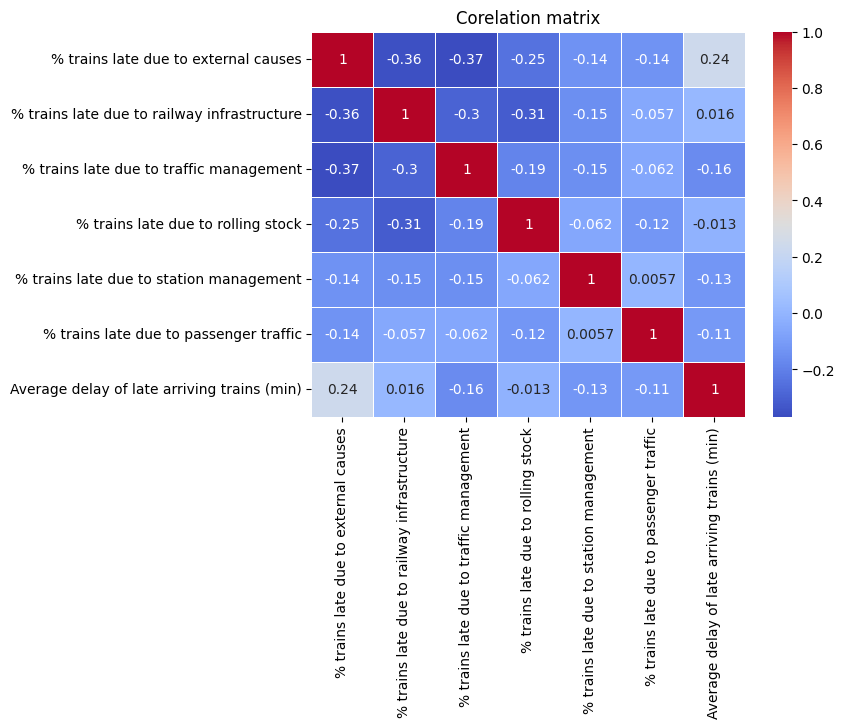

In [264]:
columns_to_analyze = ["% trains late due to external causes",
    '% trains late due to railway infrastructure',
    '% trains late due to traffic management',
    '% trains late due to rolling stock',
    '% trains late due to station management',
    '% trains late due to passenger traffic',
    'Average delay of late arriving trains (min)']
# Obliczanie macierzy korelacji
correlation_matrix = df2[columns_to_analyze].corr()

plt.figure(figsize=(7, 5)) # Ustawia rozmiar rysunku na 7 cali szerokości i 5 cali wysokości.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corelation matrix")
plt.show()

# Tworzy heatmapę z podanej macierzy korelacji (correlation_matrix). Opcja annot=True powoduje, że wartości korelacji są wyświetlane na heatmapie. cmap='coolwarm' określa paletę kolorów używaną do reprezentowania wartości korelacji, gdzie ciepłe kolory wskazują na pozytywną korelację, a zimne na negatywną. linewidths=0.5 ustawia szerokość linii oddzielających komórki na 0.5.

# Wniosek: Słaba dodatnia korelacja (0.243428) między średnim opóźnieniem spóźnionych przyjeżdzających pociągów, które przyjechały na stację, a % pociągów spóźnionych z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne itp.) może wskazywać, że te zewnętrzne przyczyny mają wpływ na opóźnienia, dodatkowo najwięcej opóźnień jest w grudniu, czyli zima może sprzyjać opóźnieniom

In [ ]:
# "% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)" = "% trains late due to external causes"

In [266]:
df2.groupby("Month")[["% trains late due to external causes"]].max().sum()

# ze względu na pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne najwięcej opóźnień jest w grudniu !

% trains late due to external causes    12.0
dtype: float64

In [321]:
df2.groupby("Departure station")[["Average travel time (min)"]].sum().round(2).sort_values(by="Average travel time (min)", ascending=False).head(5)

# Wniosek: Słaba dodatnia korelacja (0.243428) między średnim opóźnieniem spóźnionych przyjeżdzających pociągów, które przyjechały na stację, a % pociągów spóźnionych z przyczyn zewnętrznych (pogoda, przeszkody, podejrzane przesyłki, wrogość, ruchy społeczne itp.) może wskazywać, dodatkowo najwięcej opóźnień jest w grudniu, czyli zima może sprzyjać opóźnieniom jest w mieście PARIS LYON. DLaczego ?
# Paris-Lyon, jest jednym z sześciu głównych dworców czołowych Paryża. Korzysta z niego około 83 milionów pasażerów rocznie, co czyni go trzecim wśród największych dworców kolei pod względem ilości odprawionych podróżnych. 

,Average travel time (min)
Departure station,
PARIS LYON,276419.80
PARIS MONTPARNASSE,152930.92
MARSEILLE ST CHARLES,57784.46
LYON PART DIEU,53482.09
PARIS EST,37554.73


In [331]:
df2.groupby("Departure station")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Pięć stacji, z których odjeżdżające pociągi mają największe średnie opóźnienie. To może być użyteczne dla zarządców kolei do identyfikacji stacji, które mogą wymagać dodatkowych zasobów lub zmian w zarządzaniu, aby poprawić punktualność. 
# W tym przykładzie, stacja w Barcelonie miałaby największe średnie opóźnienie, co sugeruje, że jest to miejsce, gdzie pociągi przybywają najbardziej opóźnione.

,Average delay of late arriving trains (min)
Departure station,
BARCELONA,52.57
PERPIGNAN,45.83
MADRID,45.61
TOURCOING,44.02
NICE VILLE,43.77


In [334]:
df2.groupby("Arrival station")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Pięć stacji przyjazdu, na których pociągi przybywają najbardziej opóźnione. To może być użyteczne dla zarządców kolei do identyfikacji stacji, które mogą wymagać dodatkowych zasobów lub zmian w zarządzaniu, aby poprawić punktualność. 

,Average delay of late arriving trains (min)
Arrival station,
BARCELONA,49.40
PERPIGNAN,48.01
BREST,46.63
MADRID,46.05
TOULOUSE MATABIAU,45.90


In [340]:
df2.groupby("Train Line")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Pięć linii kolejowych, na których pociągi przybywają najbardziej opóźnione. Na trasie BARCELONA --- PARIS LYON jest największe opóźnienie.
# Linia BARCELONA --- PARIS LYON jest największe średnie opóźnienie, co sugeruje, że jest to linia, gdzie pociągi przybywają najbardziej opóźnione. Może dlatego, że daleko ?

,Average delay of late arriving trains (min)
Train Line,
BARCELONA --- PARIS LYON,52.57
PARIS LYON --- BARCELONA,49.40
NANTES --- PARIS VAUGIRARD,48.27
PARIS LYON --- PERPIGNAN,48.01
NANTES --- STRASBOURG,46.87


In [345]:
df2.groupby("Train Line")[['Average delay of late departing trains (min)']].mean().round(2).sort_values(by='Average delay of late departing trains (min)', ascending=False).head(5)

# Pięć linii kolejowych, z których pociągi odjeżdżają najbardziej opóźnione. To może być użyteczne dla zarządców kolei do identyfikacji linii, które mogą wymagać dodatkowych zasobów lub zmian w zarządzaniu, aby poprawić punktualność. 

,Average delay of late departing trains (min)
Train Line,
GRENOBLE --- PARIS LYON,42.91
QUIMPER --- PARIS MONTPARNASSE,26.40
SAINT ETIENNE CHATEAUCREUX --- PARIS LYON,24.71
PARIS VAUGIRARD --- BORDEAUX ST JEAN,24.65
ANNECY --- PARIS LYON,24.24


In [268]:
df2.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes',
       '% trains late due to railway infrastructure',
       '% trains late due to traffic management',
       '% trains late due to rolling stock',
       '% trains late due to station management',
       '% trains late due to passenger traffic',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Train Line'],
      dtype='object')

In [269]:
# Top 5 Arrival stations in dataset
df2['Arrival station'].value_counts().head(5)

# 5 najlepszych stacji przyjazdowych, gdzie najwięcej pociągów przyjeżdza. Paris LYON najbardziej oblegany

Arrival station
PARIS LYON              1512
PARIS MONTPARNASSE      1030
PARIS EST                354
LYON PART DIEU           352
MARSEILLE ST CHARLES     252
Name: count, dtype: int64

In [346]:
df2["Departure station"].value_counts().head(5)

# 5 najlepszych stacji odjazdowych, gdzie najwięcej pociągów dojeżdza.

Departure station
PARIS LYON              1451
PARIS MONTPARNASSE      1033
LYON PART DIEU           353
PARIS EST                344
MARSEILLE ST CHARLES     264
Name: count, dtype: int64

In [347]:
df2["Year"].value_counts()

Year
2018    1471
2019    1439
2017    1270
2016    1270
2015    1237
2020     594
Name: count, dtype: int64

In [353]:
df2.groupby("Year")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(7)

# Najwięcej spóźnionych pociągów, które przyjechały z opóźnieniem na stację było w 2019 roku ze śrenia 34,79 min

,Average delay of late arriving trains (min)
Year,
2019,34.79
2015,33.71
2016,33.15
2018,32.77
2020,31.59
2017,30.97


In [293]:
df2.groupby("Year")[['Average delay of late departing trains (min)']].mean().round(2).sort_values(by='Average delay of late departing trains (min)', ascending=False).head(7)

# Najwięcej spóźnionych pociągów, które odjeżdzały z opóźnieniem było w 2016 r ze średnią 19,21 min

,Average delay of late departing trains (min)
Year,
2016,19.21
2017,18.36
2015,17.97
2019,12.59
2018,12.23
2020,4.94


In [ ]:
# '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)' = '% trains late due to external causes'

In [275]:
df2[['Average travel time (min)','% trains late due to external causes']].corr()

# istnieje słaba dodatnia korelacja między średnim czasem podróży, a procentem pociągów spóźnionych z powodów zewnętrznych (takich jak pogoda, przeszkody, podejrzane paczki, złośliwość, ruchy społeczne itp.). Wartość korelacji wynosi 0.1725, co sugeruje, że gdy czas podróży wzrasta, nieznacznie wzrasta również procent pociągów spóźnionych z tych przyczyn, ale związek ten nie jest silny.

# istnieje pewna zależność między średnim czasem podróży a opóźnieniami spowodowanymi przez czynniki zewnętrzne, nie jest ona wystarczająco silna, aby uznać ją za znaczącą przyczynę opóźnień.

,Average travel time (min),% trains late due to external causes
Average travel time (min),1.000000,0.170682
% trains late due to external causes,0.170682,1.000000


In [277]:
# '% trains late due to traffic management (rail line traffic, network interactions) = '% trains late due to traffic management'

In [278]:
df2[['Number of late trains at departure','% trains late due to traffic management']].corr()

#  bardzo słaba dodatnia korelacja między liczbą pociągów spóźnionych przy odjeździe a procentem pociągów spóźnionych z powodu zarządzania ruchem (takiego jak ruch na torach, interakcje w sieci kolejowej itp.). Wartość korelacji wynosi 0.115677, co sugeruje, że te dwie zmienne mają niewielki związek, ale nie jest to silna zależność.

# Większa liczba pociągów spóźnionych przy odjeździe niekoniecznie prowadzi do wyższego odsetka pociągów spóźnionych z powodu zarządzania ruchem. 

,Number of late trains at departure,% trains late due to traffic management
Number of late trains at departure,1.000000,0.116378
% trains late due to traffic management,0.116378,1.000000


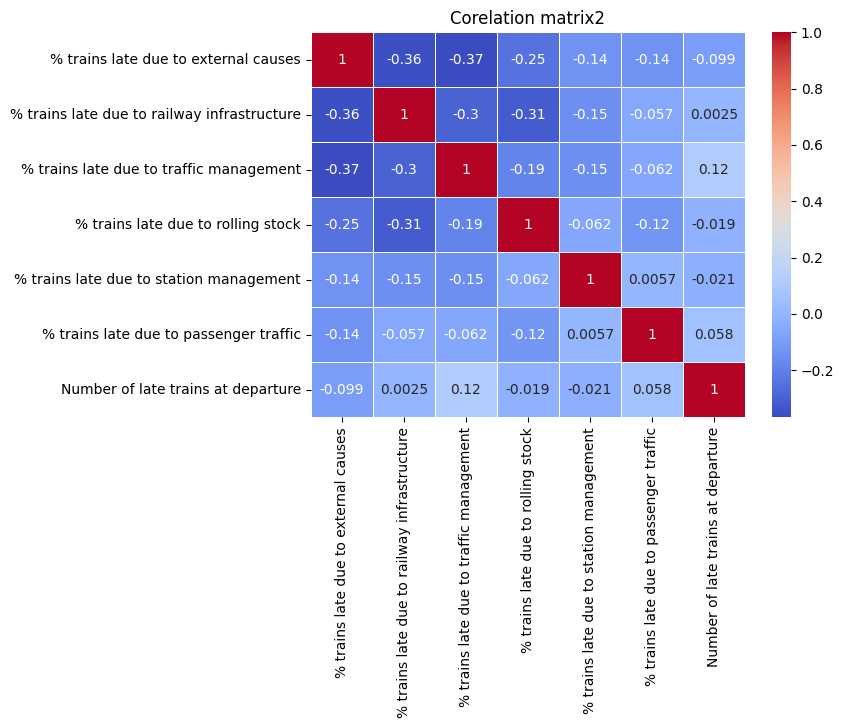

In [280]:
columns_to_analyze2 = ['% trains late due to external causes',
    '% trains late due to railway infrastructure',
    '% trains late due to traffic management',
    '% trains late due to rolling stock',
    '% trains late due to station management',
    '% trains late due to passenger traffic',
    'Number of late trains at departure']
# Obliczanie macierzy korelacji
correlation_matrix2 = df2[columns_to_analyze2].corr()

plt.figure(figsize=(7, 5)) # Ustawia rozmiar rysunku na 7 cali szerokości i 5 cali wysokości.
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corelation matrix2")
plt.show()

In [281]:
df2.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes',
       '% trains late due to railway infrastructure',
       '% trains late due to traffic management',
       '% trains late due to rolling stock',
       '% trains late due to station management',
       '% trains late due to passenger traffic',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Train Line'],
      dtype='object')

In [282]:
df2.shape # mamy 7281 wierszy, 24 kolumny

(7281, 24)

In [283]:
df2.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes',
       '% trains late due to railway infrastructure',
       '% trains late due to traffic management',
       '% trains late due to rolling stock',
       '% trains late due to station management',
       '% trains late due to passenger traffic',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Train Line'],
      dtype='object')

In [360]:
# df2.groupby("Year")['Average delay of late arriving trains (min)'].mean().reset_index().sort_values(by='Average delay of late arriving trains (min)', ascending=False).round(2)

# Najwięcej spóźnionych pociągów, które przyjechały z opóźnieniem na stację było w 2019 roku ze średnią 34,79 min

,Year,Average delay of late arriving trains (min)
4,2019,34.79
0,2015,33.71
1,2016,33.15
3,2018,32.77
5,2020,31.59
2,2017,30.97


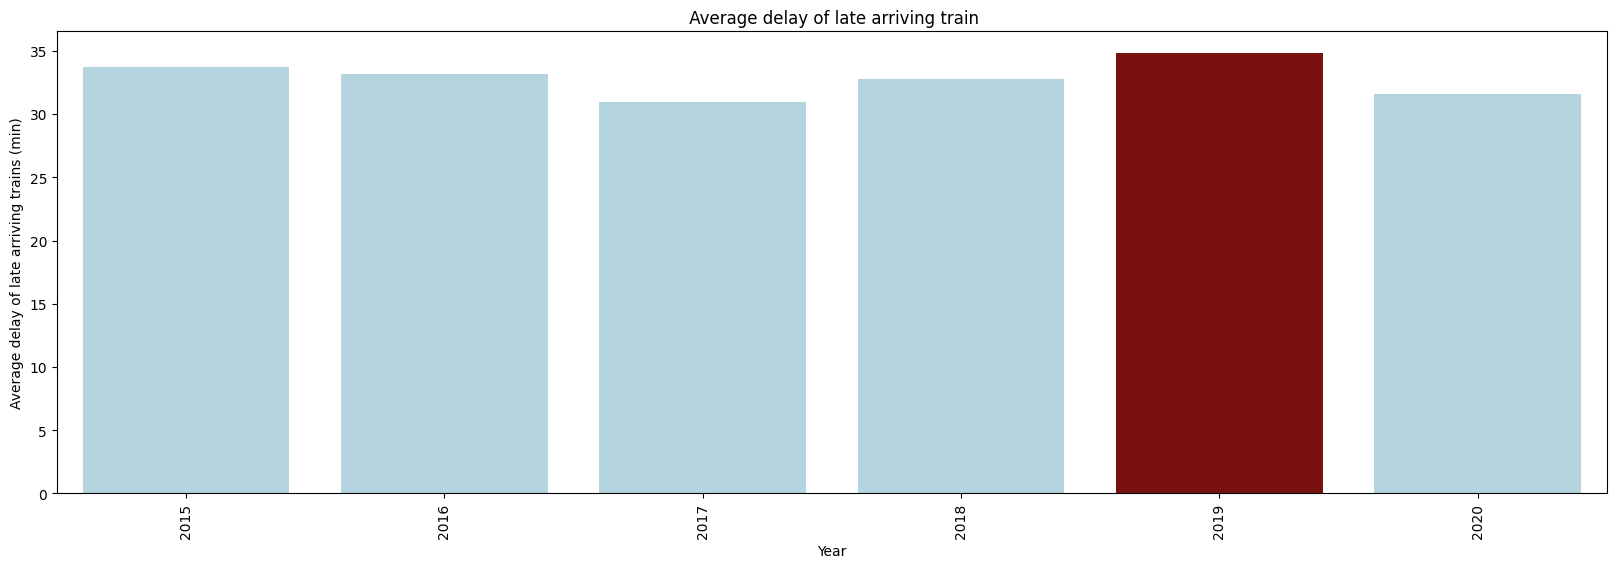

In [430]:
MeanLateArrive = df2.groupby("Year")['Average delay of late arriving trains (min)'].mean().reset_index().sort_values(by='Average delay of late arriving trains (min)', ascending=False).round(2)

# Ustawienie kolorów dla wszystkich słupków na jasno czerwony
bar_colors1 = ['lightblue' for _ in range(len(MeanLateArrive))]

# Znalezienie indeksu najwyższej wartości
max_value_index1 = MeanLateArrive['Average delay of late arriving trains (min)'].idxmax()

# Zmiana koloru dla najwyższego słupka na bardzo czerwony (np. 'darkred')
bar_colors1[max_value_index1] = 'darkred'

# Wykres słupkowy:

plt.figure(figsize = (20,6))
sns.barplot(x = "Year", y = 'Average delay of late arriving trains (min)', hue="Year", data = MeanLateArrive, palette = bar_colors1, legend=False)
plt.xlabel("Year")
plt.ylabel('Average delay of late arriving trains (min)')
plt.title(" Average delay of late arriving train")
plt.xticks(rotation = 90);

In [376]:
# df2.groupby("Train Line")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Pięć linii kolejowych, na których pociągi przybywają najbardziej opóźnione. Na trasie BARCELONA --- PARIS LYON jest największe opóźnienie.
# Linia BARCELONA --- PARIS LYON jest największe średnie opóźnienie, co sugeruje, że jest to linia, gdzie pociągi przybywają najbardziej opóźnione. Może dlatego, że daleko ?

,Average delay of late arriving trains (min)
Train Line,
BARCELONA --- PARIS LYON,52.57
PARIS LYON --- BARCELONA,49.40
NANTES --- PARIS VAUGIRARD,48.27
PARIS LYON --- PERPIGNAN,48.01
NANTES --- STRASBOURG,46.87


In [390]:
# Znalezienie indeksu najwyższej wartości. # Znalezienie etykiety wiersza z najwyższą wartością w kolumnie
max_value_index = MeanTrainLine['Average delay of late arriving trains (min)'].idxmax()
max_value_index 

'BARCELONA --- PARIS LYON'

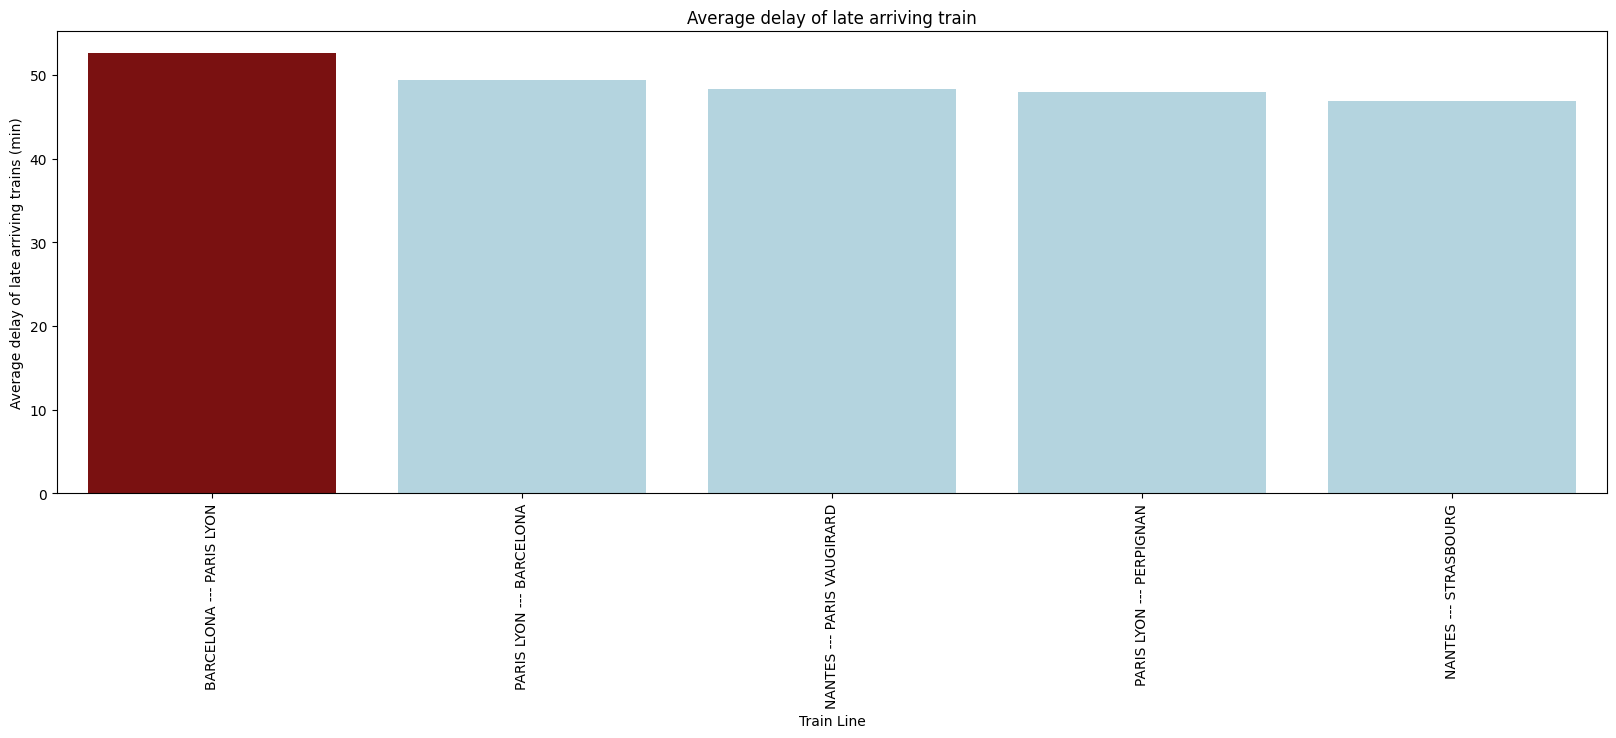

In [432]:
MeanTrainLineArrive = df2.groupby("Train Line")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Ustawienie kolorów dla wszystkich słupków na jasno czerwony, z odpowiednią długością listy
bar_colors = ['lightblue' for _ in range(len(MeanTrainLineArrive))]

# Znalezienie indeksu najwyższej wartości. # Znalezienie etykiety wiersza z najwyższą wartością w kolumnie
max_value_index = MeanTrainLineArrive['Average delay of late arriving trains (min)'].idxmax()

# Uzyskanie pozycji liczbowej etykiety w indeksie DataFrame. # Uzyskanie pozycji liczbowej etykiety ''BARCELONA --- PARIS LYON'' w indeksie DataFrame
max_value_position = MeanTrainLineArrive.index.get_loc(max_value_index)

# Zmiana koloru dla najwyższego słupka na 'darkred'
bar_colors[max_value_position] = 'darkred'

# Wykres słupkowy:
plt.figure(figsize=(20,6))
sns.barplot(x = "Train Line", y = 'Average delay of late arriving trains (min)', hue="Train Line", data = MeanTrainLineArrive, palette = bar_colors, legend=False)
plt.ylabel('Average delay of late arriving trains (min)')
plt.title("Average delay of late arriving train")
plt.xticks(rotation=90)
plt.show()

In [410]:
# df2.groupby("Train Line")[['Average delay of late departing trains (min)']].mean().round(2).sort_values(by='Average delay of late departing trains (min)', ascending=False).head(5)

# Pięć linii kolejowych, z których pociągi odjeżdżają najbardziej opóźnione. To może być użyteczne dla zarządców kolei do identyfikacji linii, które mogą wymagać dodatkowych zasobów lub zmian w zarządzaniu, aby poprawić punktualność. 

,Average delay of late departing trains (min)
Train Line,
GRENOBLE --- PARIS LYON,42.91
QUIMPER --- PARIS MONTPARNASSE,26.40
SAINT ETIENNE CHATEAUCREUX --- PARIS LYON,24.71
PARIS VAUGIRARD --- BORDEAUX ST JEAN,24.65
ANNECY --- PARIS LYON,24.24


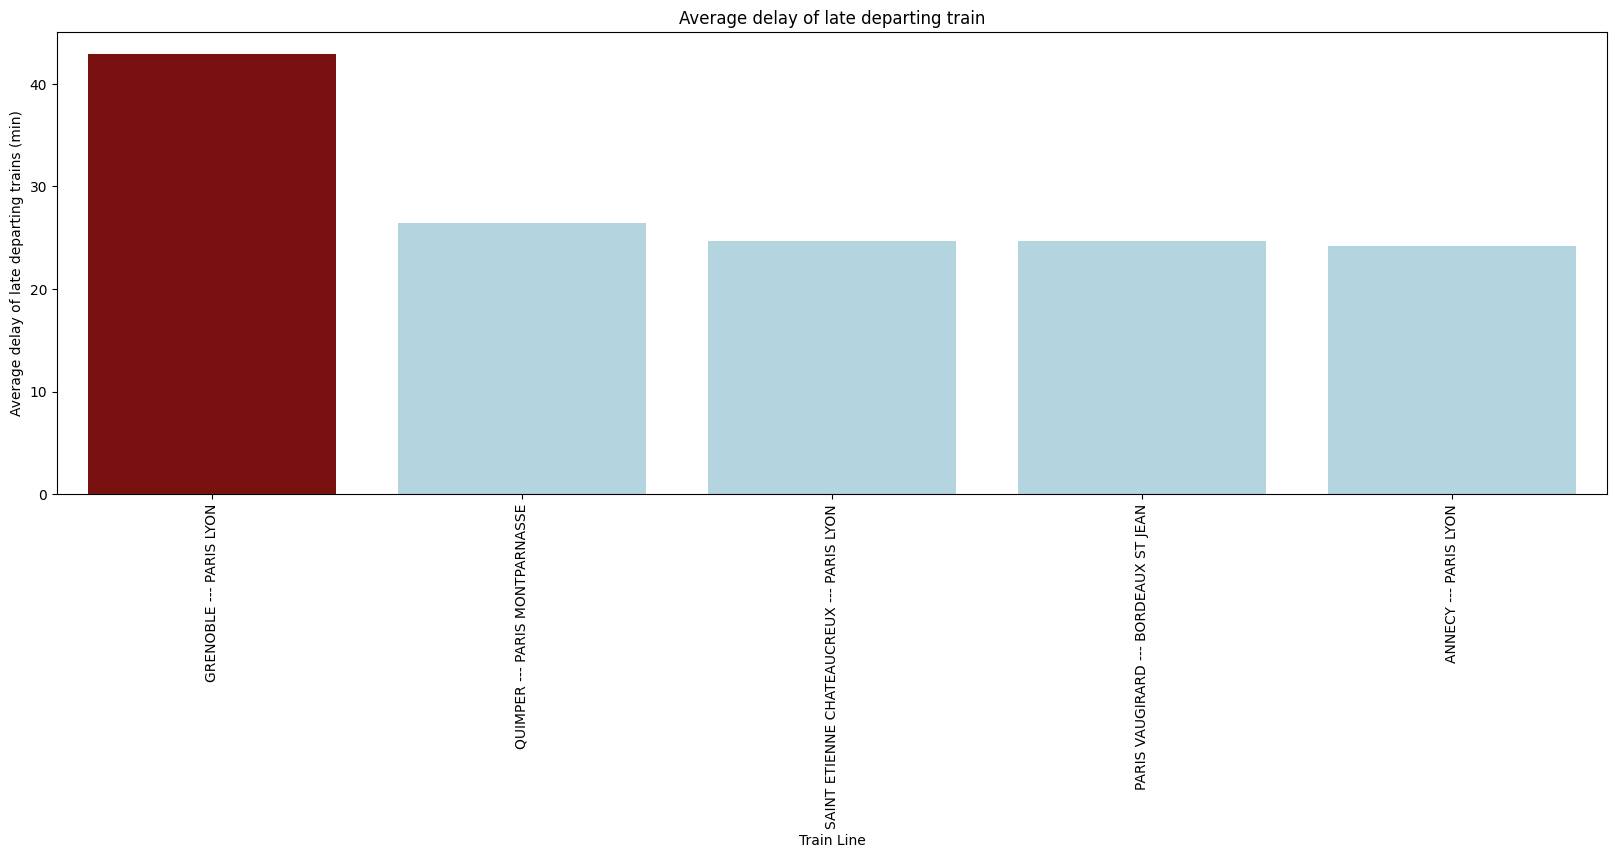

In [431]:
MeanTrainLineDepart = df2.groupby("Train Line")[['Average delay of late departing trains (min)']].mean().round(2).sort_values(by="Average delay of late departing trains (min)", ascending=False).head(5)

# Ustawienie kolorów dla wszystkich słupków na jasno czerwony, z odpowiednią długością listy
bar_colors = ['lightblue' for _ in range(len(MeanTrainLineDepart))]

# Znalezienie indeksu najwyższej wartości. # Znalezienie etykiety wiersza z najwyższą wartością w kolumnie
max_value_index = MeanTrainLineDepart['Average delay of late departing trains (min)'].idxmax()

# Uzyskanie pozycji liczbowej etykiety w indeksie DataFrame. # Uzyskanie pozycji liczbowej etykiety ''BARCELONA --- PARIS LYON'' w indeksie DataFrame
max_value_position = MeanTrainLineDepart.index.get_loc(max_value_index)

# Zmiana koloru dla najwyższego słupka na 'darkred'
bar_colors[max_value_position] = 'darkred'

# Wykres słupkowy:
plt.figure(figsize=(20,6))
sns.barplot(x = "Train Line", y = 'Average delay of late departing trains (min)', hue="Train Line", data = MeanTrainLineDepart, palette = bar_colors, legend=False)
plt.ylabel('Average delay of late departing trains (min)')
plt.title("Average delay of late departing train")
plt.xticks(rotation=90)
plt.show()

In [416]:
# df2.groupby("Arrival station")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by="Average delay of late arriving trains (min)", ascending=False).head(5)

# Pięć stacji przyjazdu, na których pociągi przybywają najbardziej opóźnione. To może być użyteczne dla zarządców kolei do identyfikacji stacji, które mogą wymagać dodatkowych zasobów lub zmian w zarządzaniu, aby poprawić punktualność. 

,Average delay of late arriving trains (min)
Arrival station,
BARCELONA,49.40
PERPIGNAN,48.01
BREST,46.63
MADRID,46.05
TOULOUSE MATABIAU,45.90


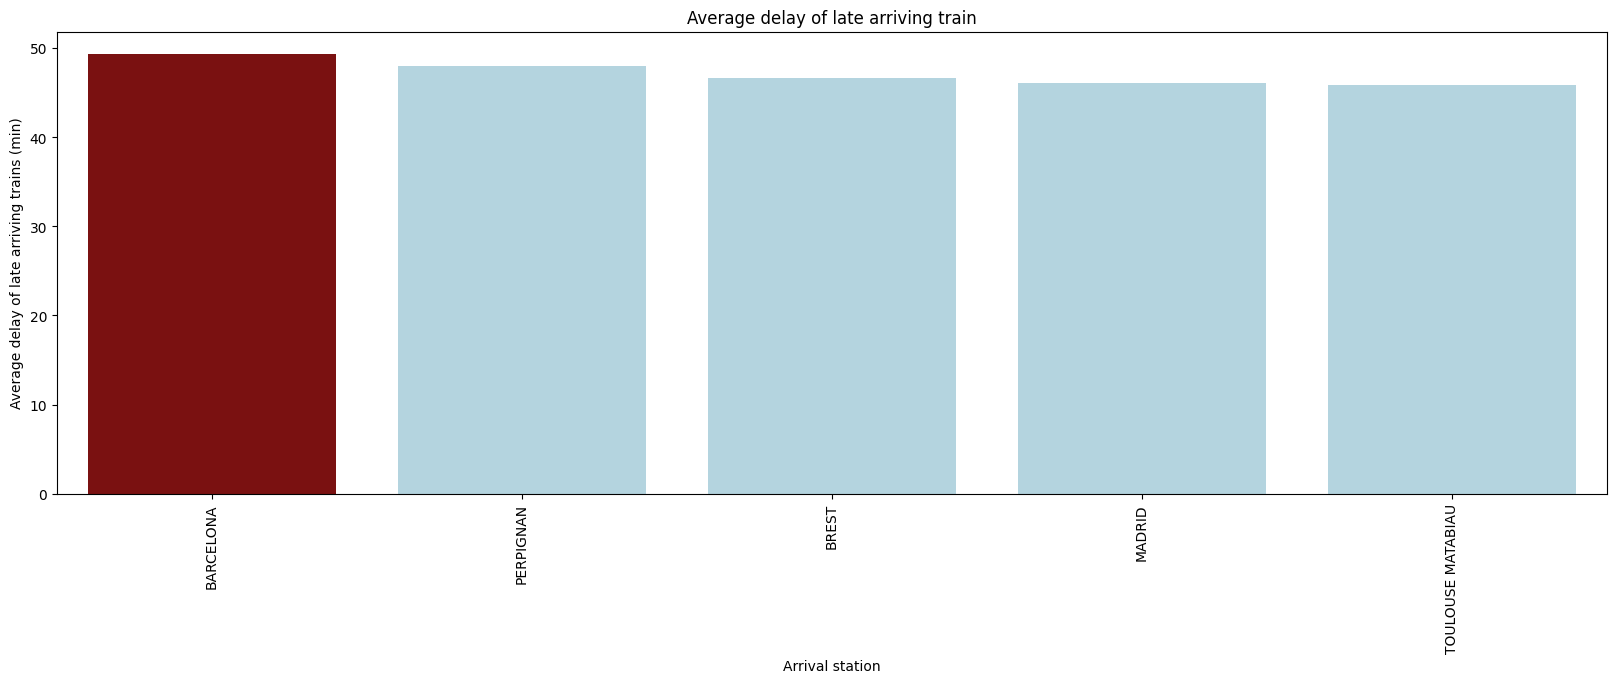

In [457]:
MeanLateArriveStation = df2.groupby("Arrival station")[['Average delay of late arriving trains (min)']].mean().round(2).sort_values(by='Average delay of late arriving trains (min)', ascending=False).head(5)

# Resetowanie indeksu DataFrame, aby 'Arrival station' stała się kolumną
MeanLateArriveStation.reset_index(inplace=True)

# Znalezienie indeksu najwyższej wartości
max_value_index = MeanLateArriveStation['Average delay of late arriving trains (min)'].idxmax()

# Uzyskanie pozycji liczbowej dla etykiety indeksu odpowiadającej najwyższej wartości
max_value_position = MeanLateArriveStation.index.get_loc(max_value_index)

# Zmiana koloru dla najwyższego słupka na 'darkred'
bar_colors[max_value_position] = 'darkred'

# Wykres słupkowy:
plt.figure(figsize=(20,6))
sns.barplot(x="Arrival station", y='Average delay of late arriving trains (min)', hue="Arrival station", data=MeanLateArriveStation, palette=bar_colors, legend=False)
plt.xlabel("Arrival station")
plt.ylabel('Average delay of late arriving trains (min)')
plt.title("Average delay of late arriving train")
plt.xticks(rotation=90)
plt.show()

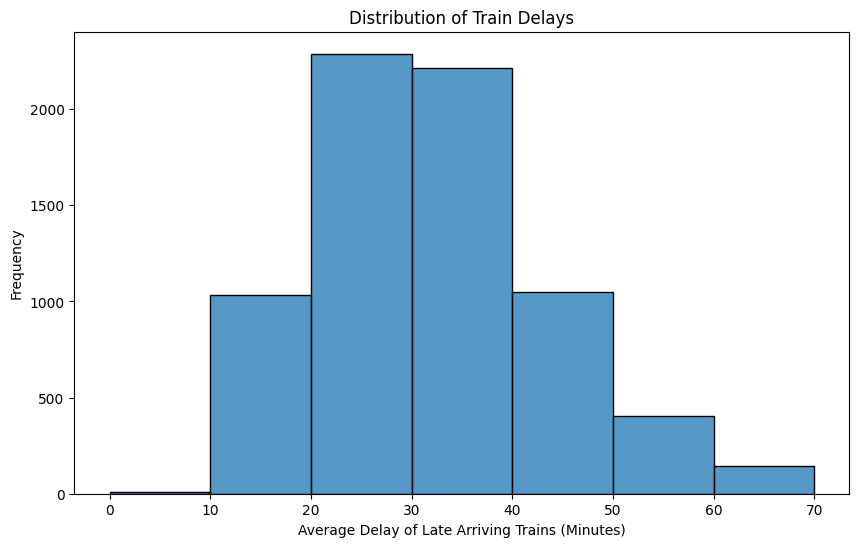

In [518]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]

plt.figure(figsize=(10,6))
sns.histplot(df2['Average delay of late arriving trains (min)'], bins=bins, kde=False)
plt.xlabel("Average Delay of Late Arriving Trains (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Train Delays")
plt.show()

# Histogram odnosi się do średniego czasu opóźnienia pociągów, które przybywają późno na stację docelową. Jest to średnia wartość, która pokazuje, ile minut, w średnim przypadku, pociąg jest opóźniony w stosunku do planowanego czasu przybycia.

# rozkład średniego opóźnienia pociągów przybywających późno, z podziałem na przedziały czasowe. Każdy słupek na wykresie odpowiada liczbie przypadków (częstotliwości), w których średnie opóźnienie pociągów mieści się w określonym przedziale czasowym.rozkład średniego opóźnienia pociągów przybywających późno, z podziałem na przedziały czasowe. Każdy słupek na wykresie odpowiada liczbie przypadków (częstotliwości), w których średnie opóźnienie pociągów mieści się w określonym przedziale czasowym.

# Wysokość każdego słupka wskazuje, ile razy w zbiorze danych wystąpiły opóźnienia należące do danego przedziału czasowego.

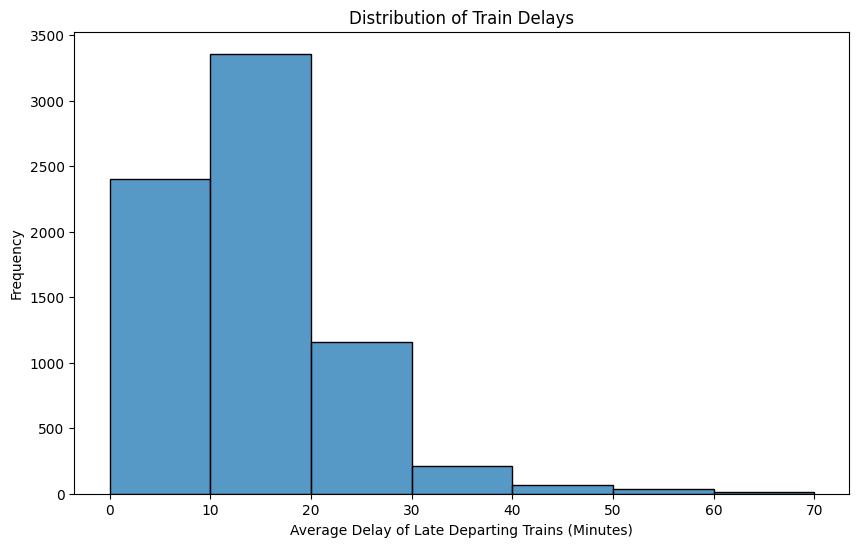

In [516]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]

plt.figure(figsize=(10,6))
sns.histplot(df2['Average delay of late departing trains (min)'], bins=bins, kde=False)    # Średnie opóźnienie spóźnionych pociągów odjeżdżających ze stacji
plt.xlabel("Average Delay of Late Departing Trains (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Train Delays")
plt.show()

#  Histogram odnosi się do średniego czasu opóźnienia pociągów, które odjeżdżają późno z ich stacji początkowej. Jest to średnia wartość, która pokazuje, ile minut, w średnim przypadku, pociąg jest opóźniony w stosunku do planowanego czasu odjazdu.